# <font style="font-size:40px"><center><b>Machine Learning</b></center></font><font                        style="font-size:30px"><center><b>Master in Computational Finance (MCF) </b></center></font> 

<center> 

# 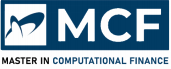

<center/>

# <font color='tomato' style="font-size:40px"><center><b>Homework 3</b></center></font></b></center></font> 

<center>
<b>profesor: </b> Nikola Vasiljevic

<b>students: </b> 
Nikola Krivacevic, Aleksandar Milinkovic
</center>





# 2 Horse Races of Classification Methods 

Based on your results and conclusions drawn from the logistic regression analysis, generate
the key performance evaluation metrics of your choice for logistic regression, linear SVC,
KNN, decision tree, and random forest algorithms. Report the results in a tabular format.
Use the scaled features to run the analysis for all the models. For the optimal probability
threshold, select the value that resulted in best performance of the logistic-regression-based
classification in the section (c) of the first problem.

*Remark:* You can consider either the scaled features with or without additional data pre-
processing, depending on the conclusions drawn in the part (a) of the first problem.

## Importing Libraries

In [1]:
# Import / install relevant Python packages
import numpy as np
import pandas as pd

from sklearn.model_selection import (KFold, GridSearchCV, RandomizedSearchCV, cross_val_score)
from sklearn import metrics
from sklearn.metrics import (classification_report, confusion_matrix)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('ggplot')
import seaborn as sns


## Helper functions

In [2]:
def classification_metrics(y_pred, y_true):

  accuracy = metrics.accuracy_score(y_pred,y_true)
  precision = metrics.recall_score(y_pred,y_true)
  recall = metrics.precision_score(y_pred,y_true)
  f1 = metrics.f1_score(y_pred,y_true)
  return {
      "Accuraccy": accuracy,
      "Precision": precision,
      "Recall": recall,
      "F1": f1
  }

## Preparing data and loading results from the first problem (*Homework_3_1.ipynb*)

### Importing Dataset - Credit Card Defaults in Taiwan in 2005 (data is already preprocessed and scaled in the first problem)

In [3]:
# UCI_Credit_Card (Engineered Features).csv should be uploaded
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card (Engineered Features).csv to UCI_Credit_Card (Engineered Features) (3).csv


### Splitting the data into training and test set

In [4]:
data = pd.read_csv('UCI_Credit_Card (Engineered Features).csv')
data.drop(columns=data.columns[0], axis=1, inplace=True)
data.head()

,PAY_0,BILL_AMT1,PAY_0 BILL_AMT1,PAY_3 BILL_AMT1,DEFAULT
0,1.942687,-0.642501,-1.248179,0.607993,1
1,-1.085297,-0.659219,0.715448,-0.019315,1
2,-0.075969,-0.298560,0.022681,-0.008748,0
3,-0.075969,-0.057491,0.004368,-0.001685,0
4,-1.085297,-0.578618,0.627972,0.547541,0


In [5]:
# Splitting the features and target variables
X = data.drop('DEFAULT', axis='columns')
y = data['DEFAULT']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

Let's now also split our dataset into the:
- Training set (80% of the observations -> 24,000 observations)
- Testing set (20% of the observations -> 6,000 observations)

In [6]:
from sklearn.model_selection import train_test_split

X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Features: train={len(X_scaled_train)} test={len(X_scaled_test)}')
print(f'Target: train={len(y_scaled_train)} test={len(y_scaled_test)}')

Features: train=24000 test=6000
Target: train=24000 test=6000


### Optimal Probability Threshold

Based on the calculations in the first problem, optimal probability threshold that will be used in this problem is ~ 0.217658

In [7]:
optimal_threshold = 0.217658

## Comparison of different Classification Methods

Let's compare the different Classification Methods. All results for logistic regression can be found in the first problem notebook.

### 1. Linear SVC

In [8]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# Define the cross-validation approach
n_cv_lsvc = 5

# Define the maximum number of iterations
n_max_iter = 2000

# Create an instance of the class LinearSVC
lsvc_model = LinearSVC(max_iter=n_max_iter)

# Define the search space for the hyperparameters
search_space = dict()
search_space['penalty'] = ['l1', 'l2']
search_space['loss']    = ['hinge', 'squared_hinge']
search_space['C']       = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# Create an instance of the class GridSearchCV with desired characteristics
lsvc_grid_search_cv_scaled = GridSearchCV(estimator=lsvc_model, 
                                          param_grid=search_space, 
                                          scoring='accuracy', 
                                          cv=n_cv_lsvc, 
                                          n_jobs=-1)

# Run the search algorithm and summarize resuts 
lsvc_grid_search_cv_scaled.fit(X_scaled_train, y_scaled_train)

print(f'Best score: {lsvc_grid_search_cv_scaled.best_score_:.4f}')
print('Best hyperparameters: %s' % lsvc_grid_search_cv_scaled.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_classes.py", line 272, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/usr/loc

Best score: 0.8164
Best hyperparameters: {'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [9]:
# Create an instance of the class LinearSVC with specific selection of hyperparameters
lsvc_ccd_scaled = LinearSVC(penalty=lsvc_grid_search_cv_scaled.best_params_['penalty'], 
                            loss=lsvc_grid_search_cv_scaled.best_params_['loss'], 
                            C=lsvc_grid_search_cv_scaled.best_params_['C'], 
                            max_iter=n_max_iter)

# Fit the model
calibrated_classifier_cv = CalibratedClassifierCV(lsvc_ccd_scaled) 
calibrated_classifier_cv.fit(X_scaled_train, y_scaled_train)

# Predict outcomes in the training and testing subsamples and calculate accuracy using optimal probability threshold
y_scaled_pred_test = (calibrated_classifier_cv.predict_proba(X_scaled_test)[:,1] > optimal_threshold).astype(int)
print(f'Accuracy: {metrics.accuracy_score(y_scaled_test,y_scaled_pred_test):.4f}')

# Store classification metrics for KNN
lsvc_classification_metrics = classification_metrics(y_scaled_test, y_scaled_pred_test)

# Display cross-validation scores for the testing subsample
print(classification_report(y_scaled_test, y_scaled_pred_test))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy: 0.7720
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4687
           1       0.48      0.54      0.51      1313

    accuracy                           0.77      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.77      0.78      6000



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


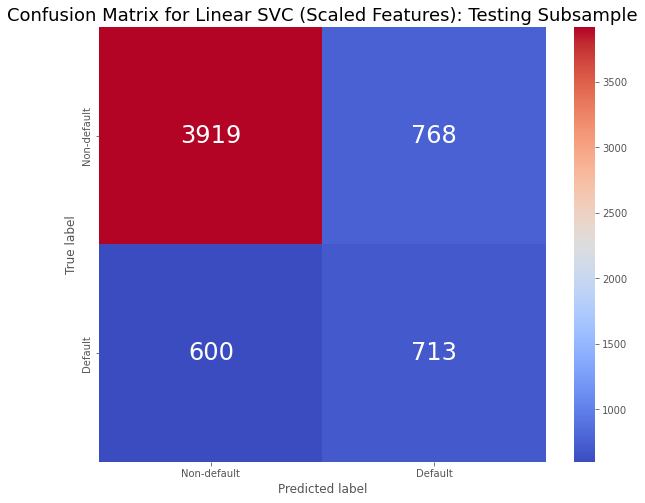

In [10]:
# Plot the confusion matrix (testing subsample)
plt.figure(figsize=(10,8))
lsvc_ccd_confusion_scaled_test = confusion_matrix(y_scaled_test,y_scaled_pred_test)
sns.heatmap(lsvc_ccd_confusion_scaled_test, annot=True, annot_kws={'size':24}, cmap='coolwarm', fmt='d', 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Linear SVC (Scaled Features): Testing Subsample', size=18)
plt.show()

### 2. K-nearest neighbors (KNN)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Define the cross-validation approach
n_cv_knn = 5

# Create an instance of the class KNN
knn_model = KNeighborsClassifier()

# Define the search space for the hyperparameters
search_space = dict()
search_space['n_neighbors'] = range(1,11)
search_space['metric']      = ['euclidean', 'manhattan']

# Create an instance of the class GridSearchCV with desired characteristics
knn_grid_search_cv_scaled = GridSearchCV(estimator=knn_model, 
                                         param_grid=search_space, 
                                         scoring='accuracy', 
                                         cv=n_cv_knn, 
                                         n_jobs=-1)

# Run the search algorithm and summarize resuts 
knn_grid_search_cv_scaled.fit(X_scaled_train, y_scaled_train)

print(f'Best score: {knn_grid_search_cv_scaled.best_score_:.4f}')
print('Best hyperparameters: %s' % knn_grid_search_cv_scaled.best_params_)

Best score: 0.8130
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10}


In [12]:
# Create an instance of the class KNN with specific selection of hyperparameters
knn_ccd_scaled = KNeighborsClassifier(n_neighbors=knn_grid_search_cv_scaled.best_params_['n_neighbors'], 
                                      metric=knn_grid_search_cv_scaled.best_params_['metric'])

# Fit the model
knn_ccd_scaled.fit(X_scaled_train, y_scaled_train)

# Predict outcomes in the testing subsample and calculate accuracy using optimal probability threshold
y_scaled_pred_test = (knn_ccd_scaled.predict_proba(X_scaled_test)[:,1] > optimal_threshold).astype(int)
print(f'Accuracy: {metrics.accuracy_score(y_scaled_test,y_scaled_pred_test):.4f}')

# Store classification metrics for KNN
knn_classification_metrics = classification_metrics(y_scaled_test, y_scaled_pred_test)

# Display cross-validation scores for the testing subsample
print(classification_report(y_scaled_test, y_scaled_pred_test))

Accuracy: 0.7215
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      4687
           1       0.41      0.59      0.48      1313

    accuracy                           0.72      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.77      0.72      0.74      6000



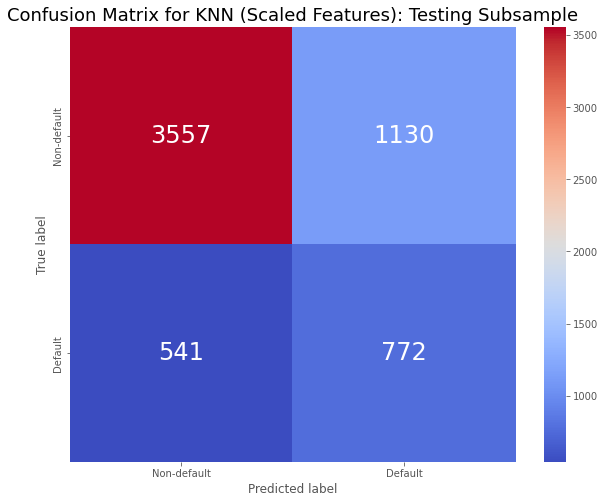

In [13]:
plt.figure(figsize=(10,8))
knn_ccd_confusion_scaled_test = confusion_matrix(y_scaled_test,y_scaled_pred_test)
sns.heatmap(knn_ccd_confusion_scaled_test, annot=True, annot_kws={'size':24}, cmap='coolwarm', fmt='d', 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for KNN (Scaled Features): Testing Subsample', size=18)
plt.show()

### 3. Decision trees

In [14]:
from sklearn.tree import (DecisionTreeClassifier, plot_tree)

# Define the cross-validation approach
n_cv_dt = 5

# Create an instance of the class DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Define the search space for the hyperparameters
search_space = dict()
search_space['max_depth']        = [2, 3, 4]
search_space['max_features']     = [2, 3, 4]
search_space['min_samples_leaf'] = [2, 3, 4]
search_space['criterion']        = ['gini', 'entropy']

# Create an instance of the class RandomizedSearchCV with desired characteristics
dt_randomized_search_cv_scaled = RandomizedSearchCV(estimator=dt_model, 
                                                    param_distributions=search_space, 
                                                    scoring='accuracy', 
                                                    cv=n_cv_dt, 
                                                    n_jobs=-1)

# Run the search algorithm and summarize resuts 
dt_randomized_search_cv_scaled.fit(X_scaled_train, y_scaled_train)

print(f'Best score: {dt_randomized_search_cv_scaled.best_score_:.4f}')
print('Best hyperparameters: %s' % dt_randomized_search_cv_scaled.best_params_)

Best score: 0.8206
Best hyperparameters: {'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 3, 'criterion': 'gini'}


In [15]:
# Create an instance of the class DecisionTreeClassifier with specific selection of hyperparameters
dt_ccd_scaled = DecisionTreeClassifier(max_depth=dt_randomized_search_cv_scaled.best_params_['max_depth'], 
                                       max_features=dt_randomized_search_cv_scaled.best_params_['max_features'], 
                                       min_samples_leaf=dt_randomized_search_cv_scaled.best_params_['min_samples_leaf'],
                                       criterion=dt_randomized_search_cv_scaled.best_params_['criterion'])

# Fit the model
dt_ccd_scaled.fit(X_scaled_train, y_scaled_train)

# Predict outcomes in the testing subsamples and calculate accuracy using optimal probability threshold
y_scaled_pred_test = (dt_ccd_scaled.predict_proba(X_scaled_test)[:,1] > optimal_threshold).astype(int)
print(f'Accuracy: {metrics.accuracy_score(y_scaled_test, y_scaled_pred_test,):.4f}')

# Store classification metrics for Decistion Tree
dt_classification_metrics = classification_metrics(y_scaled_test, y_scaled_pred_test)

print(classification_report(y_scaled_test, y_scaled_pred_test))

Accuracy: 0.7618
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4687
           1       0.46      0.57      0.51      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.76      0.77      6000



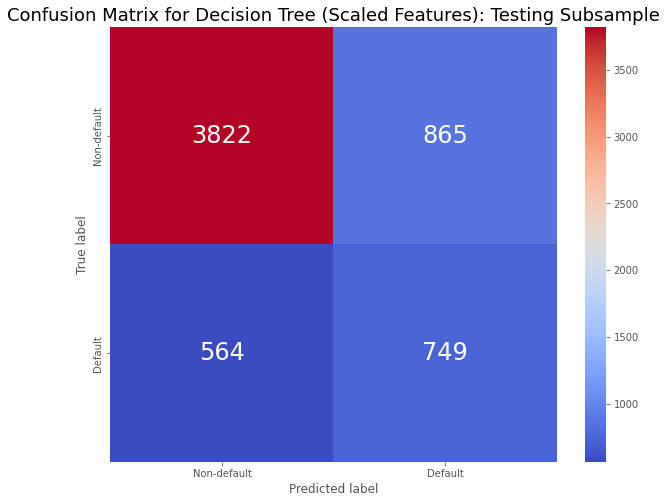

In [16]:
# Plot the confusion matrix (testing subsample)
plt.figure(figsize=(10,8))
dt_ccd_confusion_scaled_test = confusion_matrix(y_scaled_test,y_scaled_pred_test)
sns.heatmap(dt_ccd_confusion_scaled_test, annot=True, annot_kws={'size':24}, cmap='coolwarm', fmt='d', 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Decision Tree (Scaled Features): Testing Subsample', size=18)
plt.show()

### 4. Random forest algorithms

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the cross-validation approach
n_cv_rf = 5

# Create an instance of the class RandomForestClassifier
rf_model = RandomForestClassifier()

# Define the search space for the hyperparameters
search_space = dict()
search_space['n_estimators']     = [50, 100, 150, 200, 250]
search_space['max_depth']        = [2, 3, 4]
search_space['max_features']     = [2, 3, 4]
search_space['min_samples_leaf'] = [2, 3, 4]
search_space['criterion']        = ['gini', 'entropy']

# Create an instance of the class RandomizedSearchCV with desired characteristics
rf_randomized_search_cv_scaled = RandomizedSearchCV(estimator=rf_model, 
                                                    param_distributions=search_space, 
                                                    scoring='accuracy', 
                                                    cv=n_cv_rf, 
                                                    n_jobs=-1)

# Run the search algorithm and summarize resuts 
rf_randomized_search_cv_scaled.fit(X_scaled_train, y_scaled_train)

print(f'Best score: {rf_randomized_search_cv_scaled.best_score_:.4f}')
print('Best hyperparameters: %s' % rf_randomized_search_cv_scaled.best_params_)

Best score: 0.8205
Best hyperparameters: {'n_estimators': 200, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 3, 'criterion': 'entropy'}


In [18]:
# Create an instance of the class RandomForestClassifier with specific selection of hyperparameters
rf_ccd_scaled = RandomForestClassifier(n_estimators=rf_randomized_search_cv_scaled.best_params_['n_estimators'], 
                                       max_depth=rf_randomized_search_cv_scaled.best_params_['max_depth'], 
                                       max_features=rf_randomized_search_cv_scaled.best_params_['max_features'], 
                                       min_samples_leaf=rf_randomized_search_cv_scaled.best_params_['min_samples_leaf'],
                                       criterion=rf_randomized_search_cv_scaled.best_params_['criterion'])

# Fit the model
rf_ccd_scaled.fit(X_scaled_train, y_scaled_train)

# Predict outcomes in the testing subsamples and calculate accuracy using optimal probability threshold
y_scaled_pred_test = (rf_ccd_scaled.predict_proba(X_scaled_test)[:,1] > optimal_threshold).astype(int)

# Store classification metrics for KNN
rf_classification_metrics = classification_metrics(y_scaled_test, y_scaled_pred_test)

print(f'Accuracy: {metrics.accuracy_score(y_scaled_test,y_scaled_pred_test):.4f}')
print(classification_report(y_scaled_test, y_scaled_pred_test))

Accuracy: 0.7653
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      4687
           1       0.47      0.57      0.52      1313

    accuracy                           0.77      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.78      0.77      0.77      6000



## Tabular comparison of Classification Methods

Let's compare 5 different Classification Methods and their metrics. 

The optimal probability threshold that has been used is: 0.217658.

### Classification Metrics for all Methods (testing sample)

In [19]:
lsvc_classification_metrics

{'Accuraccy': 0.772,
 'F1': 0.5103793843951324,
 'Precision': 0.543031226199543,
 'Recall': 0.4814314652261985}

In [20]:
knn_classification_metrics

{'Accuraccy': 0.7215,
 'F1': 0.48024883359253495,
 'Precision': 0.587966488956588,
 'Recall': 0.4058885383806519}

In [21]:
dt_classification_metrics

{'Accuraccy': 0.7618333333333334,
 'F1': 0.5117868124359413,
 'Precision': 0.5704493526275705,
 'Recall': 0.46406443618339527}

In [22]:
rf_classification_metrics

{'Accuraccy': 0.7653333333333333,
 'F1': 0.5154852030282175,
 'Precision': 0.5704493526275705,
 'Recall': 0.4701820464532329}

### Tabular presentation

| Method/Metric | Accuracy | Precision | Recall | F1 |
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.7713 | 0.4803 | 0.5484 | 0.5121
| Linear SVC | 0.7720 | 0.5430 | 0.4814 | 0.5104
| K-nearest Neighbors | 0.7215 | 0.5880 | 0.4059 | 0.4803
| Decision Tree | 0.7618 | 0.5704 | 0.4641 | 0.5118
| Random Forrest | 0.7653 | 0.5704 | 0.4702 | 0.5155